<a href="https://colab.research.google.com/github/hmarathe420/Titanic_Classification/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project - Titanic Classification**
## **Name - Harshal Marathe**
### **Project Type - Classification**
#### **Role - Data Science Intern at Bharat Intern**

### **Project Summary -**

As a Data Science Intern at Bharat Intern, I have been assigned the pivotal role of crafting a robust classification model that not only predicts survival outcomes but also showcases your analytical and problem-solving skills. This project offers a unique opportunity to contribute to the field of data science and gain hands-on experience in a real-world scenario.


The "Titanic Classification" project is an exciting opportunity for a Data Science Intern at Bharat Intern to apply advanced machine learning techniques and predictive modeling to solve a real-world challenge. The project centers around predicting the survival status of passengers aboard the ill-fated RMS Titanic using historical data.

In this role, you will dive into the world of data analysis, feature engineering, and model development to build a classification model that accurately predicts whether a passenger survived or not. The project will involve the following key steps:


1. Data Collection and Preprocessing:
Collect and preprocess the Titanic dataset, ensuring data quality and handling missing values. Explore the dataset to gain insights into the various attributes and their relationships with survival.

2. Exploratory Data Analysis:
Conduct exploratory data analysis (EDA) to uncover patterns, trends, and correlations within the dataset. Visualize key features and their impact on survival rates, which will guide feature selection and engineering.

3. Feature Engineering:
Engineer relevant features that enhance the predictive power of the model. Consider transforming or combining attributes to capture more meaningful information from the data.

4. Model Selection and Training:
Evaluate different machine learning algorithms suited for classification tasks and select the most appropriate ones. Train and fine-tune models using techniques like cross-validation to ensure optimal performance.

5. Model Evaluation and Interpretation:
Assess the performance of the trained models using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score. Interpret the results to understand the strengths and limitations of each model.

### Import Required Libraries

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data collection and Understanding

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Titanic Classification/Titanic-Dataset.csv")

In [4]:
# top 5 rows of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# last 5 rows of dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Describe the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# shape of dataset
df.shape

(891, 12)

In [9]:
# counting the duplicate rows of the dataset
df.duplicated().sum()

0

In [10]:
# counting the missing or null values of the dataset
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above analysis we get to know that there are 891 rows and 12 column in our dataset and there are 177 null values in age column and 687 null values in Cabin columns in this dataset. from the dataset information we get to know that there are int, float and object datatypes present in this dataset.

### Data Cleaning and Pre-Processing

In [11]:
# dropping the cabin column
df.drop('Cabin', axis = 1, inplace = True)

As we know that from the above analysis the Cabin column contain 687 null values so that's why we have dropped that column for cleaned our dataset.

In [16]:
# filling the null values in age column with there mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [20]:
# Fill missing values in embarked column by imputing the mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [23]:
# checking whether null values filled out or not
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Above we have filled the null values in Age column with their mean value and in the Embarked column we have filled the null values with their mode value. hence we have done the data cleaning now we can move forward for the data visualization and finding the insinghts from the dataset.

### Exploratory Data Analysis and Data Visualization

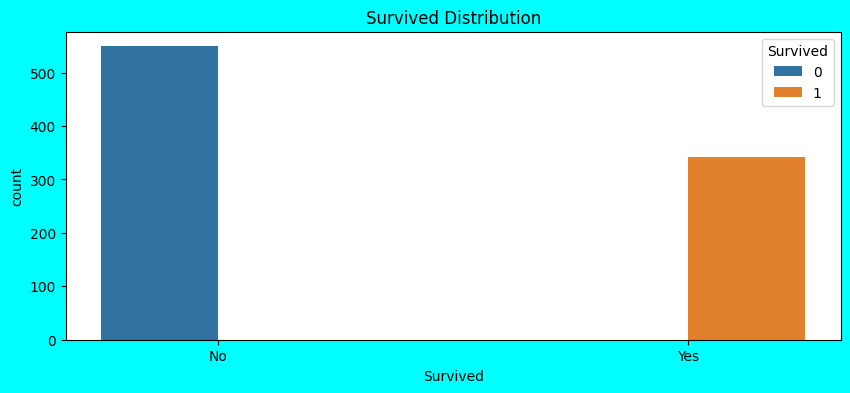

In [95]:
from sqlalchemy import label
# ploting the count plot for survived distribution
plt.figure(figsize =(10,4), facecolor = 'aqua')
sns.countplot(x = df['Survived'], width = 0.5, hue = df['Survived'])
plt.xticks([0,1],['No','Yes'])
plt.title("Survived Distribution")
plt.plot()
plt.show()

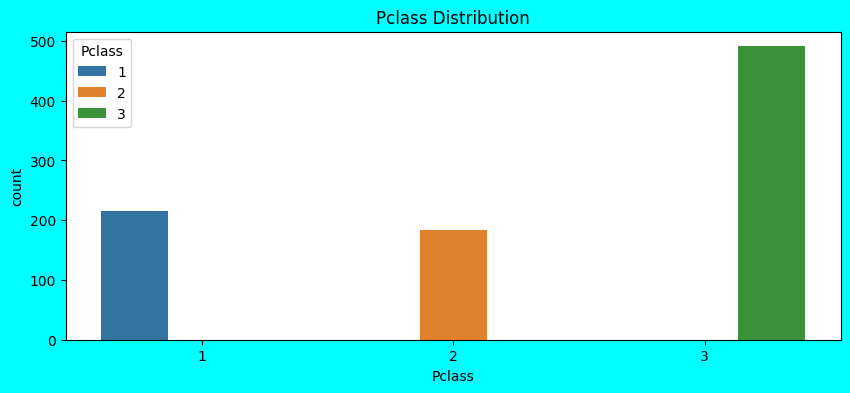

In [60]:
# countplot for Pclass Distribution
plt.figure(figsize = (10,4), facecolor = 'aqua')
sns.countplot(x = df['Pclass'], hue = df['Pclass'])
plt.title("Pclass Distribution")
plt.plot()
plt.show()

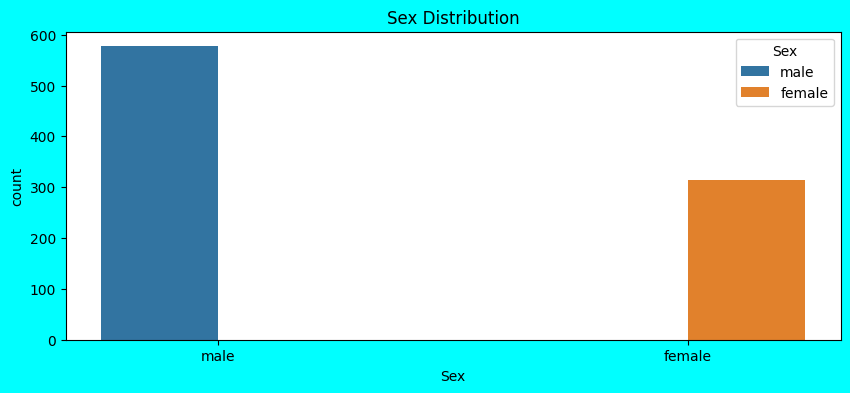

In [64]:
# ploting the grah for sex distribution
plt.figure(figsize = (10,4), facecolor = 'aqua')
sns.countplot(x = df['Sex'], hue = df['Sex'], width = 0.5)
plt.title("Sex Distribution")
plt.plot()
plt.show()

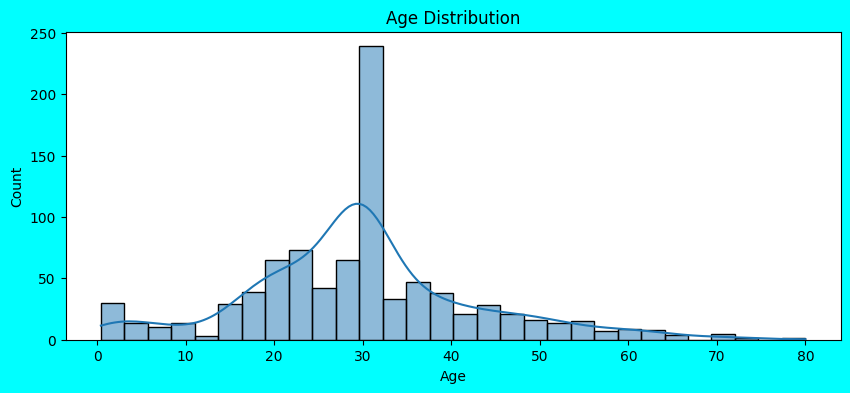

In [76]:
# ploting the histplot for age distribution
plt.figure(figsize = (10,4), facecolor = 'aqua')
sns.histplot(df['Age'], kde = True)
plt.title("Age Distribution")
plt.plot()
plt.show()

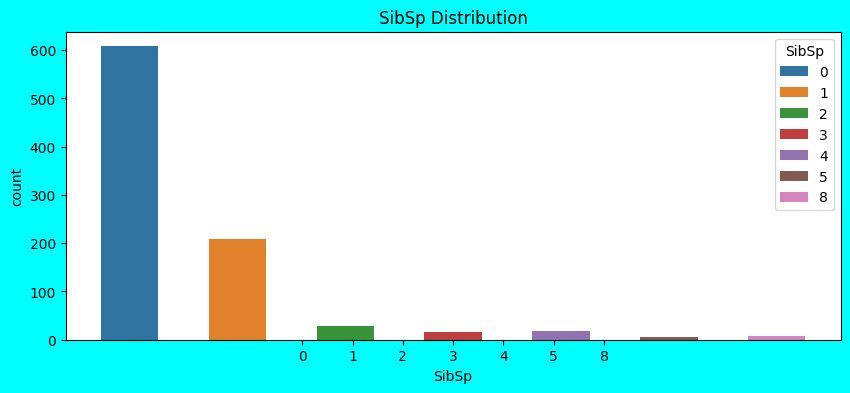

In [92]:
# ploting count plot for distribution of SibSp
plt.figure(figsize = (10,4), facecolor = 'aqua')
sns.countplot(x = df['SibSp'], hue = df['SibSp'], width = 8)
plt.title("SibSp Distribution")
plt.plot()
plt.show()

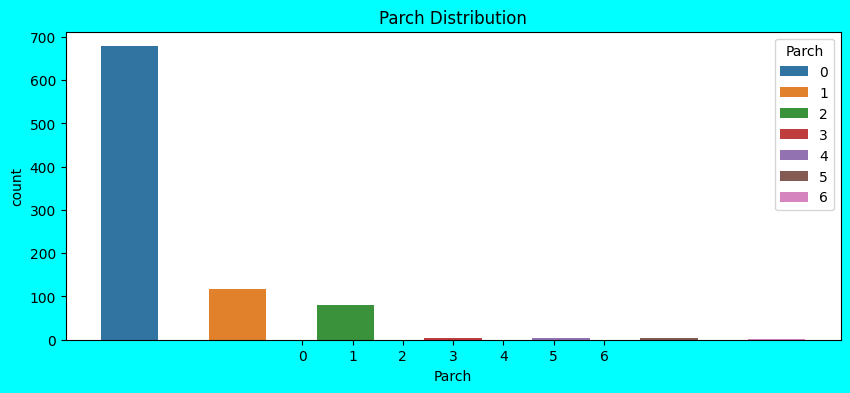

In [102]:
# Parch distribution with countplot
plt.figure(figsize = (10,4), facecolor = 'aqua')
sns.countplot(x = df['Parch'], hue = df['Parch'], width = 8)
plt.title("Parch Distribution")
plt.plot()
plt.show()

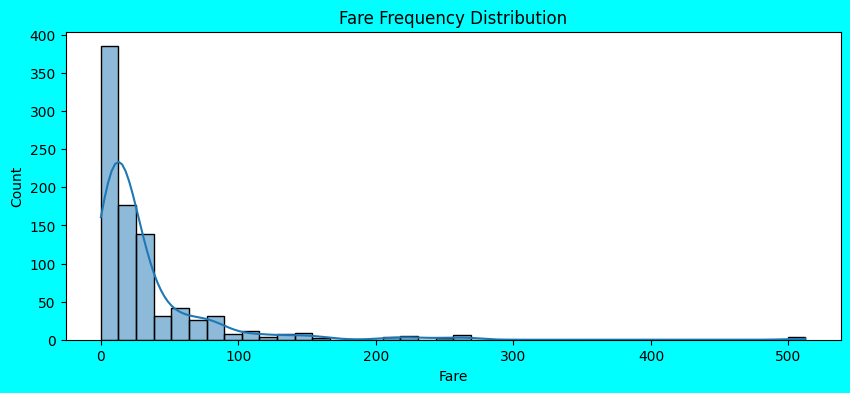

In [119]:
# ploting histplot for knowing the frequency destribution of fare column.
plt.figure(figsize = (10,4), facecolor = 'aqua')
sns.histplot(df['Fare'], bins = 40, kde = True)
plt.title("Fare Frequency Distribution")
plt.plot()
plt.show()

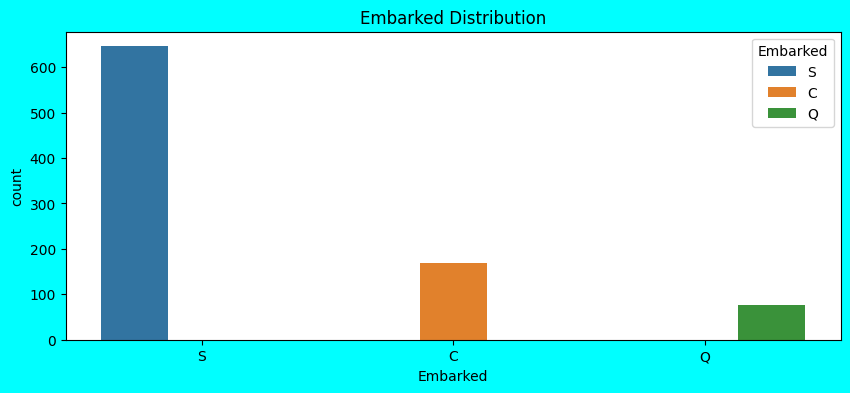

In [151]:
# Embarked Distribution using countplot
plt.figure(figsize = (10,4), facecolor = 'aqua')
sns.countplot(data = df , x = 'Embarked', width = 0.8, hue = 'Embarked')
plt.title("Embarked Distribution")
plt.plot()
plt.show()

### Machine Learning

### **Conclusion :**